In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
#Loading the datasets
train = pd.read_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\train_v9rqX0R.csv")
test = pd.read_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\test_AbJTz2l.csv")

# Getting an initial look at the data

In [261]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [262]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [263]:
train.nunique()

Item_Identifier              1559
Item_Weight                   415
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [264]:
test.nunique()

Item_Identifier              1543
Item_Weight                   410
Item_Fat_Content                5
Item_Visibility              5277
Item_Type                      16
Item_MRP                     4402
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
dtype: int64

###### Since there are 1559 unique items in Item_Identifier in Train and only 1543 in Test, we can conclude that there are some (16) items in the test data which are not present in the train data.

In [265]:
def unique_values(data):
    for i in data.columns:
        print(i,":",data[i].value_counts())


unique_values(train)

Item_Identifier : Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: count, Length: 1559, dtype: int64
Item_Weight : Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64
Item_Fat_Content : Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
Item_Visibility : Item_Visibility
0.000000    526
0.076975      3
0.162462      2
0.076841      2
0.073562      2
           ... 
0.013957      1
0.110460      1
0.124646      1
0.054142      1
0.044878      1
Name: count, Length: 7880, dtype: int64
Item_Type : Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                

In [266]:
unique_values(test)

Item_Identifier : Item_Identifier
DRF48    8
FDZ50    8
FDQ60    8
FDN52    8
FDW10    8
        ..
FDW49    1
FDG38    1
FDD38    1
FDA15    1
FDF04    1
Name: count, Length: 1543, dtype: int64
Item_Weight : Item_Weight
10.500    57
17.600    53
15.600    48
20.250    47
19.350    46
          ..
6.980      1
6.320      1
5.465      1
5.945      1
7.670      1
Name: count, Length: 410, dtype: int64
Item_Fat_Content : Item_Fat_Content
Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: count, dtype: int64
Item_Visibility : Item_Visibility
0.000000    353
0.060879      2
0.097213      2
0.058461      2
0.058132      2
           ... 
0.082382      1
0.026175      1
0.155144      1
0.069557      1
0.104720      1
Name: count, Length: 5277, dtype: int64
Item_Type : Item_Type
Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned   

In [267]:
# Fixing inconstencies in Item_Fat_Content
train["Item_Fat_Content"] = train["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace({"LF": "Low Fat", "reg": "Regular", "low fat": "Low Fat"})

In [268]:
# Converting Outlet_Establishment_Year to Years_Since_Established
train["Outlet_Establishment_Year"] = 2025 - train["Outlet_Establishment_Year"]
test["Outlet_Establishment_Year"] = 2025 - test["Outlet_Establishment_Year"]

In [269]:
# Renaming a few columns for convinience
train = train.rename(columns={"Outlet_Establishment_Year": "Years_Since_Establishment", "Item_Identifier": "Item", "Outlet_Identifier": "Outlet"})
test = test.rename(columns={"Outlet_Establishment_Year": "Years_Since_Establishment","Item_Identifier": "Item", "Outlet_Identifier": "Outlet"})

## Dealing with missing values

In [270]:
train.isnull().sum()

Item                            0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet                          0
Years_Since_Establishment       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [271]:
test.isnull().sum()

Item                            0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet                          0
Years_Since_Establishment       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [272]:
# Combine train and test for consistent imputation
combined = pd.concat([train, test], ignore_index=True)


In [273]:
# Checking if the Item_Weight is consistent for each unique Item
item_weight_consistency = combined.groupby("Item")["Item_Weight"].nunique()

# Identifying any inconsistencies
inconsistent_items = item_weight_consistency[item_weight_consistency > 1]

# Displaying the inconsistent items if any
inconsistent_items


Series([], Name: Item_Weight, dtype: int64)

##### We can see that each Item has only a single weight associated with it, therefore **using the combined datasets (train & test), we fill in the missing values in the Item_Weight Column** 

In [274]:
# Create a lookup dictionary for Item_Weight
item_weight_lookup = combined.groupby("Item")["Item_Weight"].first().to_dict()

# Fill missing Item_Weight values using the lookup dictionary
combined["Item_Weight"] = combined.apply(
    lambda row: item_weight_lookup[row["Item"]] if pd.isnull(row["Item_Weight"]) else row["Item_Weight"],
    axis=1
)

# Split back into train and test sets
train_cleaned = combined[:len(train)]
test_cleaned = combined[len(train):]

print("Missing values in train[Item_Weight] after imputation:", train_cleaned["Item_Weight"].isnull().sum())
print("Missing values in test[Item_Weight] dataset after imputation:", test_cleaned["Item_Weight"].isnull().sum())


Missing values in train[Item_Weight] after imputation: 0
Missing values in test[Item_Weight] dataset after imputation: 0


In [275]:
# Re-chcking if we have imputed the Item Weights correctly

def check_unique_item_weight_per_identifier(df):
    """
    Checks whether each Item has a unique Item_Weight associated with it.
    
    Parameters:
    df (pd.DataFrame): The dataset containing Item and Item_Weight columns.
    
    Returns:
    bool: True if each Item has a unique Item_Weight, False otherwise.
    """
    unique_weights_per_item = df.groupby("Item")["Item_Weight"].nunique()
    return unique_weights_per_item.max() == 1  # True if all identifiers have only one unique weight

# Check uniqueness in the cleaned train and test datasets
is_unique_train = check_unique_item_weight_per_identifier(train_cleaned)
is_unique_test = check_unique_item_weight_per_identifier(test_cleaned)

is_unique_train, is_unique_test


(True, True)

In [276]:
train_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item                       8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet                     8523 non-null   object 
 7   Years_Since_Establishment  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


#### Now we deal with Outlet_Size missing values

In [277]:
train_cleaned['Outlet_Size'].isna().sum(), test_cleaned['Outlet_Size'].isna().sum()

(2410, 1606)

In [278]:
# Checking the missing values in Outlet_Size overall
combined['Outlet_Size'].isna().sum()

4016

In [279]:
# Checking the stores for which the Outlet_Size is missing
combined[combined['Outlet_Size'].isna()].groupby('Outlet').size()

Outlet
OUT010     925
OUT017    1543
OUT045    1548
dtype: int64

##### Only 3 outlets do not have their associated Outlet_Size information

In [280]:
from dython import nominal

### Evaluating Correlations amongst all features

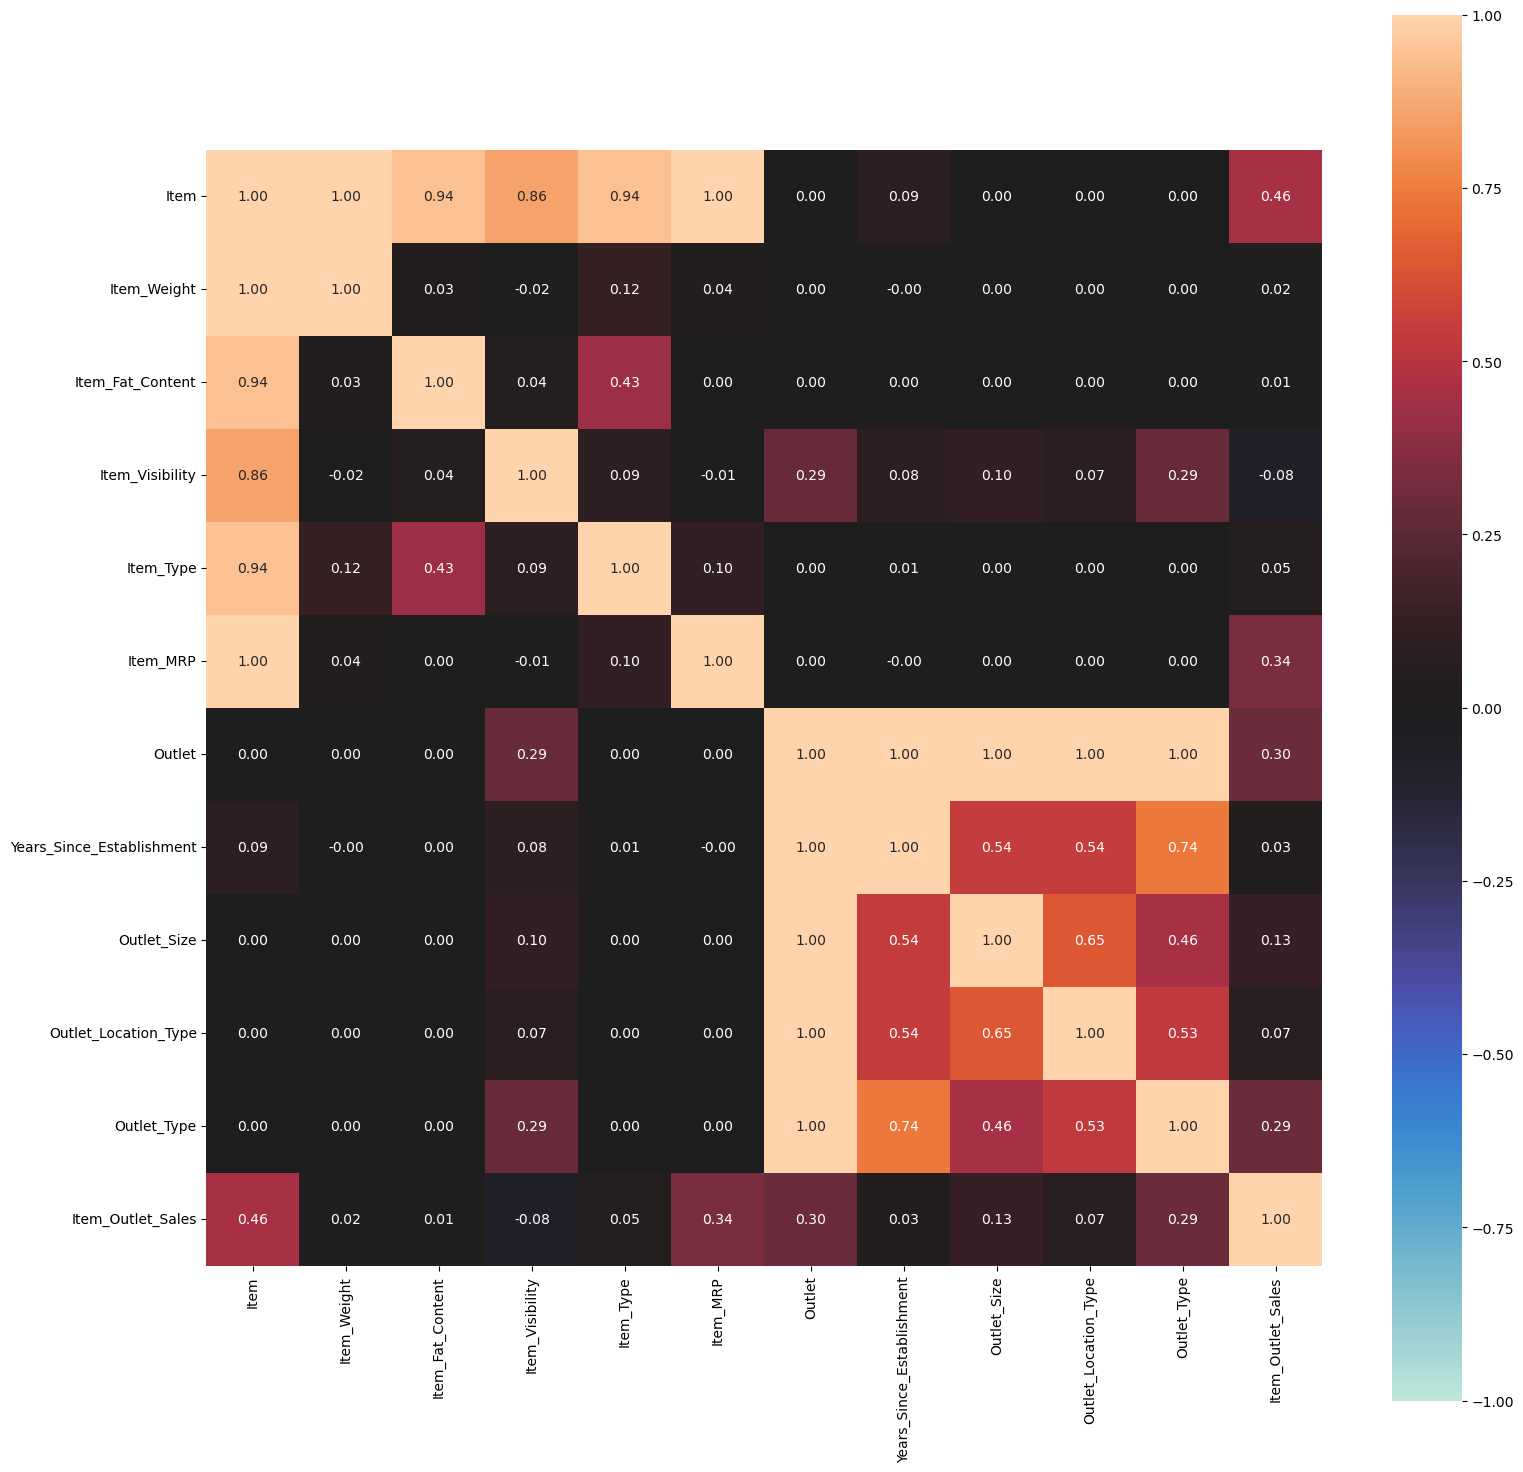

In [281]:
all_corr = nominal.associations(combined)

##### We notice that Outlet_Size is mostly related to Outlet features only 

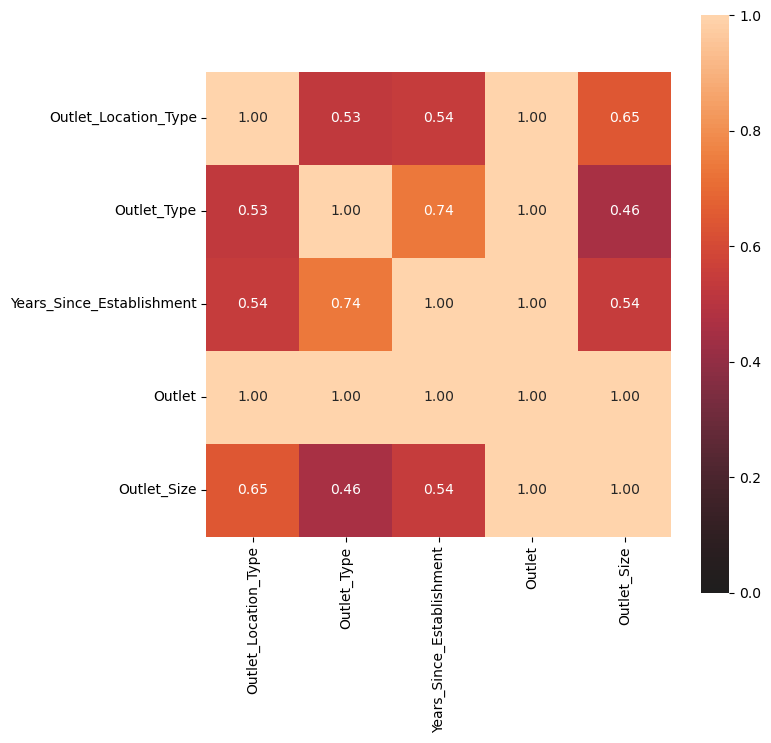

In [282]:
cat_cols=["Outlet_Location_Type", "Outlet_Type", "Years_Since_Establishment", "Outlet", "Outlet_Size"]

cat_corr = nominal.associations(combined[cat_cols])
cat_corr = pd.DataFrame(cat_corr['corr'])

<Axes: >

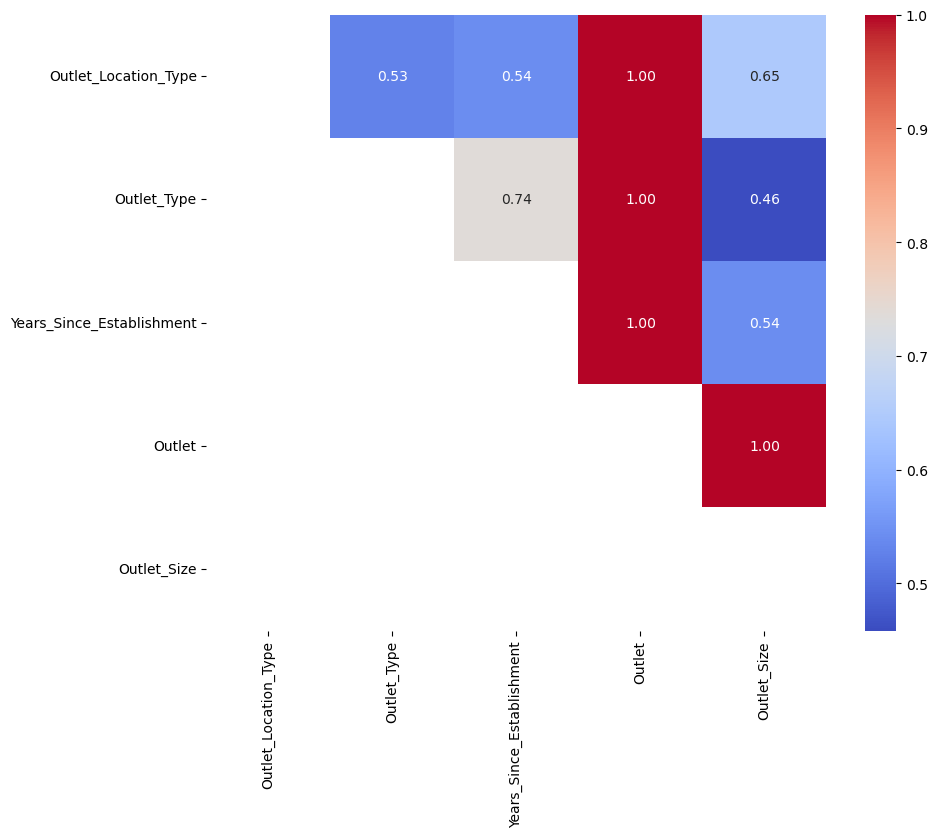

In [283]:
mask = np.tril(np.ones_like(cat_corr, dtype=bool))  # Create a upper triangular mask
plt.figure(figsize=(10, 8))
sns.heatmap(cat_corr, annot=True, fmt=".2f", cmap='coolwarm', mask=mask)

#### We notice that Outlet_Size is directly related to the Outlet ofcourse, but then also sufficiently correlated to Outlet_Location_Type, Outlet_Type and Years_Since_Establishment 

In [284]:
# Extracting the dataset that contains missing values in Outlet_Size
outlet_size_missing = combined[combined['Outlet_Size'].isna()]
outlet_size_missing.isnull().sum()

Item                            0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet                          0
Years_Since_Establishment       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            1606
dtype: int64

In [285]:
outlet_size_missing.groupby('Outlet_Location_Type').size()

Outlet_Location_Type
Tier 2    3091
Tier 3     925
dtype: int64

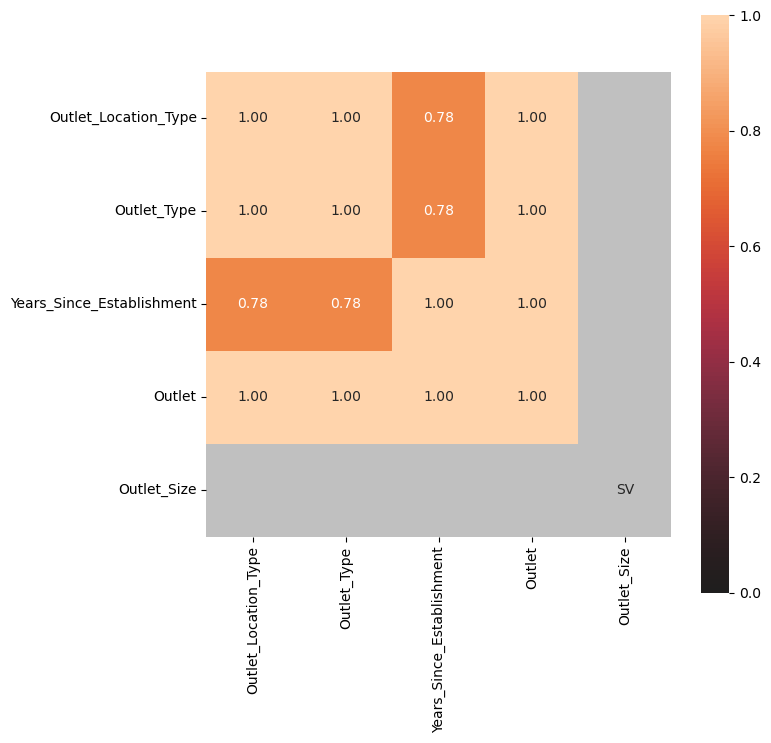

In [286]:
outlet_size_missing_corr = nominal.associations(outlet_size_missing[cat_cols])


#### Since we have information about the features that affect Outlet_Size, we create a classification model using **CatBoost for predicting the most accurate Outlet_Size possible**, *since we can never know what is the ground truth here is, as the data seems to not be collected only*.

In [287]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

# Create a copy of the dataset
data = combined.copy()

# Define categorical and numerical columns
categorical_columns = ['Outlet_Type', 'Outlet_Location_Type', 'Outlet']
numerical_columns = ['Years_Since_Establishment']

# Convert categorical columns to strings for CatBoost compatibility
for col in categorical_columns:
    data[col] = data[col].astype(str)

# Separate rows with known and missing Outlet_Size
known_outlet_size = data[data['Outlet_Size'].notna()]
unknown_outlet_size = data[data['Outlet_Size'].isna()]

# Define features and target for known data
X = known_outlet_size[categorical_columns + numerical_columns]
y = known_outlet_size['Outlet_Size']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Set up a small parameter grid for grid search
param_grid = {
    'iterations': [200, 500],     # Number of boosting iterations
    'depth': [4, 6],              # Depth of the trees
    'learning_rate': [0.05, 0.1], # Learning rate
    'cat_features': [categorical_columns]  # Specify categorical columns for CatBoost
}

# Initialize the CatBoostClassifier
clf = CatBoostClassifier(verbose=0, random_seed=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    scoring='accuracy',  # Use accuracy as the scoring metric
    cv=3,                # 3-fold cross-validation
    verbose=1,
    n_jobs=-1            # Use all available cores
)

# Perform grid search
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Train the best model on the full training data
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Prepare unknown data for prediction
unknown_X = unknown_outlet_size[categorical_columns + numerical_columns]

# Predict missing Outlet_Size values
predicted_outlet_size = best_model.predict(unknown_X)

# Fill missing Outlet_Size values in the original dataset
data.loc[data['Outlet_Size'].isna(), 'Outlet_Size'] = predicted_outlet_size

# Check that there are no more missing values
print("Remaining missing Outlet_Size:", data['Outlet_Size'].isna().sum())


Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best Parameters: {'cat_features': ['Outlet_Type', 'Outlet_Location_Type', 'Outlet'], 'depth': 4, 'iterations': 200, 'learning_rate': 0.05}
Best CV Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       311
      Medium       1.00      1.00      1.00       919
       Small       1.00      1.00      1.00       808

    accuracy                           1.00      2038
   macro avg       1.00      1.00      1.00      2038
weighted avg       1.00      1.00      1.00      2038

Remaining missing Outlet_Size: 0


In [304]:
# To use the models later, we can save them using the pickle module
import pickle

with open(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Saved Models\catboost_outlet_size_model.pkl", 'wb') as file:
	pickle.dump(best_model, file)


#### The model has provided expectional results, hence **we use these values moving forward**. Alternatively, we could have also just created another Category "NAN/Unknown" but we use this approach to condense as much as information possible from the given data without introducing artificial variables.

In [288]:
# Re-chcking if we have imputed the Item Weights correctly

def check_unique_outletsize_weight_per_outlet(df):
    """
    Checks whether each Outlet has a unique Outlet_Size associated with it.
    
    Parameters:
    df (pd.DataFrame): The dataset containing Outlet and Outlet_Size columns.
    
    Returns:
    bool: True if each Outlet has a unique Outlet_Size, False otherwise.
    """
    unique_weights_per_item = df.groupby("Outlet")["Outlet_Size"].nunique()
    return unique_weights_per_item.max() == 1  # True if all identifiers have only one unique weight

# Check uniqueness in the cleaned train and test datasets
is_unique_data = check_unique_outletsize_weight_per_outlet(data)
is_unique_data

True

In [289]:
data.isnull().sum()

Item                            0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet                          0
Years_Since_Establishment       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [290]:
# Split back into train and test sets
train_cleaned = data[:len(train)]
test_cleaned = data[len(train):]


In [291]:
# Save the cleaned datasets
train_cleaned.to_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\train_cleaned.csv", index=False)
test_cleaned.to_csv(r"C:\Users\malli\Documents\GitHub\Big-Mart-Sales-Prediction-Practice-Problem--\Datasets\test_cleaned.csv", index=False)
